# PA 1
Id- 18-38596-2

Name - Md Mahtab Hossain Bhuiyan

In [3]:
import os
import random
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
%matplotlib inline

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(f"Shape of x_train: {x_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print()
print(f"Shape of x_test: {x_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

11493376/11490434 [==============================] - 0s 0us/step
Shape of x_train: (60000, 28, 28)
Shape of y_train: (60000,)

Shape of x_test: (10000, 28, 28)
Shape of y_test: (10000,)


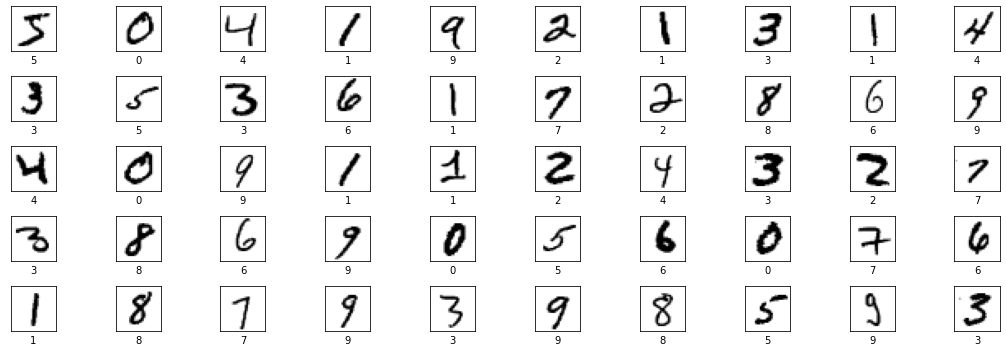

In [5]:
ROWS = 5
COLS = 10
i = 0
plt.figure(figsize=(15,5))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(x_train[i], cmap=plt.cm.gray_r)
        plt.xticks([])
        plt.yticks([])
        plt.xlabel(y_train[i])
        i += 1
plt.tight_layout()
plt.show()

Normalized data

In [6]:
x_train=x_train.reshape(-1,28,28,1)
x_test=x_test.reshape(-1,28,28,1)
x_train, x_test = x_train / 255.0, x_test / 255.0

Not normalized data

In [ ]:
# x_train=x_train.reshape(-1,28,28,1)
# x_test=x_test.reshape(-1,28,28,1)

In [24]:
model = keras.Sequential([
    keras.Input(shape=(28,28,1)),
    layers.Conv2D(filters=64, kernel_size=(5,5), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    
    layers.Flatten(),
    layers.Dense(32, activation='relu'),
    layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_37 (Conv2D)           (None, 24, 24, 64)        1664      
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 10, 10, 128)       73856     
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 5, 5, 128)         0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 3, 3, 64)          73792     
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 64)              

In [25]:
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [ ]:
# model.compile(
#     optimizer='RMSProp', 
#     loss='sparse_categorical_crossentropy', 
#     metrics=['accuracy']
# )

In [ ]:
# model.compile(
#     optimizer='SGD', 
#     loss='sparse_categorical_crossentropy', 
#     metrics=['accuracy']
# )

In [26]:
h = model.fit(x=x_train, y=y_train, epochs=10, validation_split=0.2, batch_size=32)

Epoch 1/10
1500/1500 [==============================] - 109s 73ms/step - loss: 0.2015 - accuracy: 0.9370 - val_loss: 0.0768 - val_accuracy: 0.9768
Epoch 2/10
1500/1500 [==============================] - 107s 71ms/step - loss: 0.0645 - accuracy: 0.9798 - val_loss: 0.0470 - val_accuracy: 0.9861
Epoch 3/10
1500/1500 [==============================] - 106s 71ms/step - loss: 0.0456 - accuracy: 0.9864 - val_loss: 0.0442 - val_accuracy: 0.9878
Epoch 4/10
1500/1500 [==============================] - 106s 70ms/step - loss: 0.0328 - accuracy: 0.9899 - val_loss: 0.0514 - val_accuracy: 0.9849
Epoch 5/10
1500/1500 [==============================] - 105s 70ms/step - loss: 0.0277 - accuracy: 0.9912 - val_loss: 0.0571 - val_accuracy: 0.9871
Epoch 6/10
1500/1500 [==============================] - 105s 70ms/step - loss: 0.0202 - accuracy: 0.9937 - val_loss: 0.0456 - val_accuracy: 0.9879
Epoch 7/10
1500/1500 [==============================] - 106s 70ms/step - loss: 0.0194 - accuracy: 0.9940 - val_loss: 0

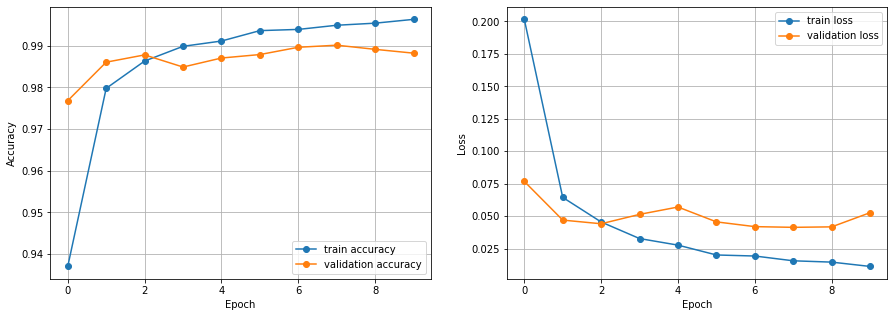

In [27]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')
plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')
plt.show()

In [28]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

313/313 [==============================] - 6s 17ms/step - loss: 0.0454 - accuracy: 0.9885

Test Accuracy: 0.9884999990463257

Test Loss: 0.04540227726101875


In [29]:
predictions = model.predict(x_test)
predictions[15]

array([2.1879863e-10, 5.4000866e-09, 2.8007159e-09, 1.9829403e-04,
       4.7576304e-13, 9.9979311e-01, 3.8976684e-09, 1.6005360e-10,
       8.5516294e-06, 1.9635873e-08], dtype=float32)

In [30]:
np.argmax(predictions[15])

5

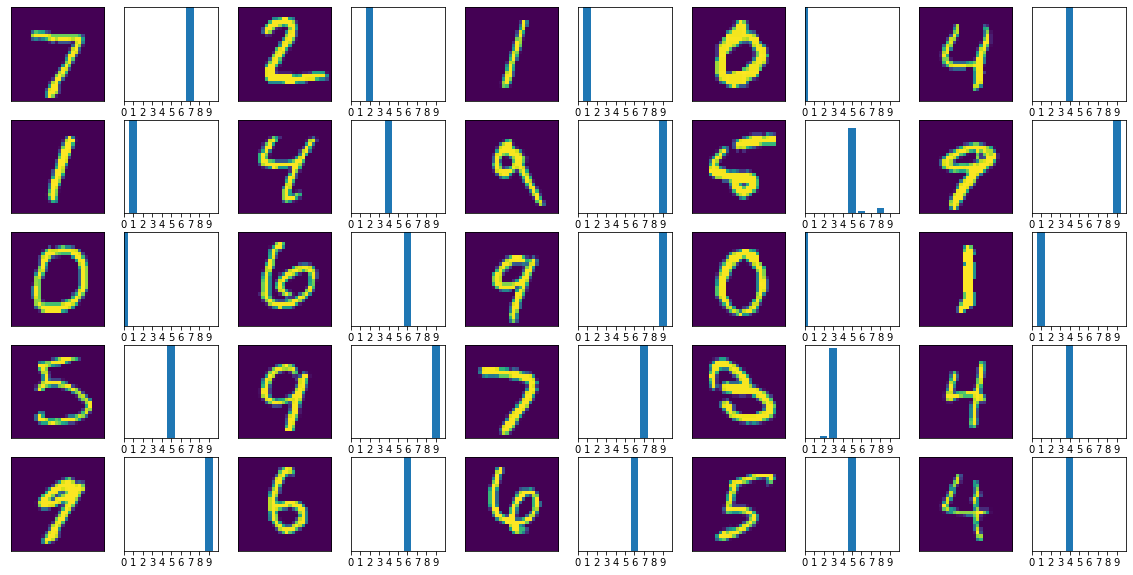

In [32]:
x_train=x_train=x_train.reshape(-1,28,28)
x_test=x_test=x_test.reshape(-1,28,28)
rows = 5
cols = 5
plt.figure(figsize=(20,10))
for i in range(25):
    plt.subplot(rows, 2*cols, 2*i+1)
    plt.imshow(x_test[i])
    plt.xticks([])
    plt.yticks([])
    plt.subplot(rows, 2*cols, 2*i+2)
    plt.bar(range(10), predictions[i])
    plt.yticks([])
    plt.xticks(range(0,10))
    plt.ylim([0,1])
    plt.xlim([0,10])
plt.show()

## Analysis of using and not using data normalization

# After using Adam with normalization we got the highest accuracy at 10th epoch is 99.64% and val_acc is 98.83%. But without normalization we get the accuracy 99.51% and val_acc 97.04% at 10th epoch. So we can say that,with normalization we get a slightly better result. By using SGD with normalized we get the highest accuracy at 10th epoch is 98.2% and val_acc is 96.33%. But without normalization we get the accuracy 15.21% and val_acc 12.34% at 10th epoch.and here also we can see the improved version for normalization . After using RMSProp with normalized we get the highest accuracy at 10th epoch is 99.88% and value_accurary is 99.7%. But without normalization we get the accuracy 97.84% and val_acc 98.28% at 10th epoch.